In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import wilcoxon

## Generating a single F-beta plot

In [48]:
cm = pd.read_csv("./default and optimal/rf_multi_optimal_test_cov_3.5.csv", index_col=0)

In [49]:
cm.columns = range(75)

In [50]:
cm.columns

RangeIndex(start=0, stop=75, step=1)

In [51]:
new_cm = pd.DataFrame(columns = ["TN", "FP", "FN", "TP"])
for i in range(75):
    true_negative = 0
    for j in range(75):
        if j == i:
            continue
        true_negative += sum(cm[j][0:i].append(cm[j][i+1:]))
    new_cm.loc[i] = [true_negative, sum(cm[i][0:i].append(cm[i][i+1:])), sum(cm.iloc[i][0:i].append(cm.iloc[i][i+1:])), cm[i][i]]

Text(0, 0.5, 'F-beta Score')

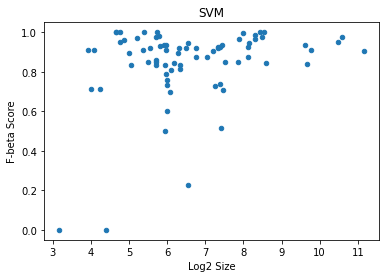

In [52]:
cm = new_cm
labels = pd.read_csv("labels.csv")
dataset_sizes = pd.read_csv("subset sizes.csv", header = None)
cm["TN"] = cm["TN"].astype(np.int64)
cm["FP"] = cm["FP"].astype(np.int64)
cm["FN"] = cm["FN"].astype(np.int64)
cm["TP"] = cm["TP"].astype(np.int64)
cm = cm.assign(precision = cm["TP"] / (cm["TP"] + cm["FP"]))
cm["precision"].astype(np.float64)
#cm["precision"].fillna(1, inplace=True)
cm = cm.assign(recall = cm["TP"] / (cm["TP"] + cm["FN"]))
cm["recall"].astype(np.float64)
cm = cm.assign(f1 = 2 * 1 / ((1 / cm["precision"]) + (1 / cm["recall"])))
cm = cm.assign(fbeta = (1 + 0.5 ** 2) * (cm["precision"] * cm["recall"]) / ((0.5 ** 2 * cm["precision"]) + cm["recall"]))
cm["fbeta"].fillna(0, inplace=True)
cm["cluster"] = labels["0"]
cm = cm.merge(dataset_sizes, how = 'inner', left_on='cluster', right_on=0)
cm.drop(columns=0, inplace = True)
cm.rename(columns={1:"size"}, inplace = True)
cm["log_size"] = np.log2(cm["size"])
fig = cm.plot.scatter(x="log_size", y="fbeta", title="SVM", ylim=[-0.05,1.05]).get_figure()
plt.xlabel("Log2 Size")
plt.ylabel("F-beta Score")

In [53]:
cm.to_csv("./default and optimal/rf_multi_optimal_test_cov_3.5.csv")

## Generating ROC Curves

In [7]:
data = pd.read_csv("./datasets/svm_roc_curve.csv", index_col = 0)

<ipython-input-20-5e36c9e805c2>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


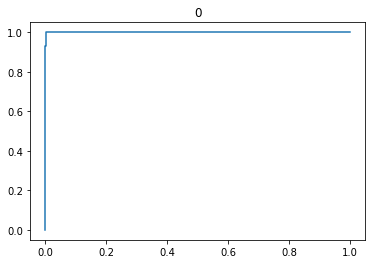

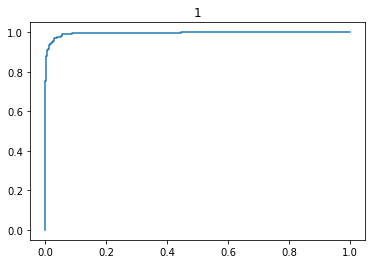

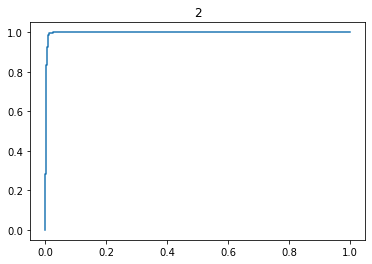

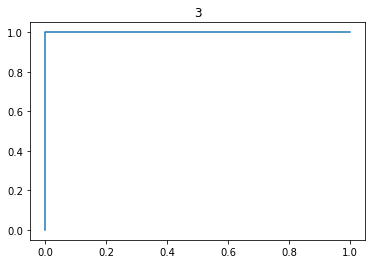

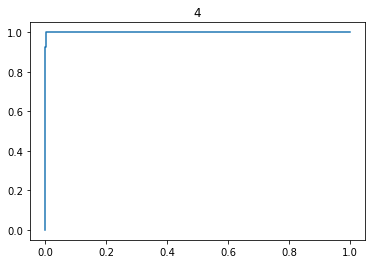

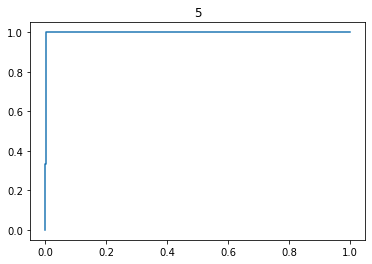

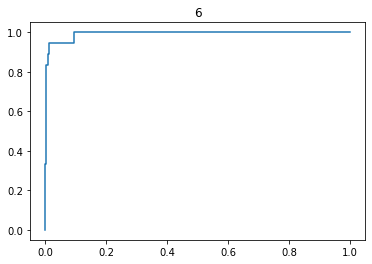

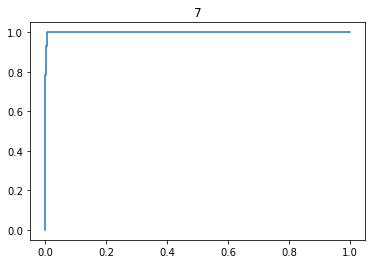

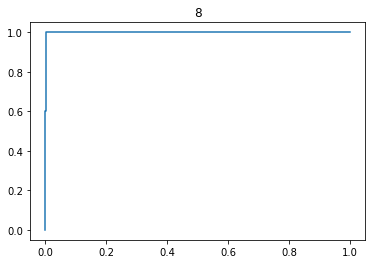

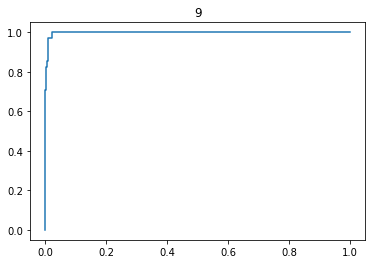

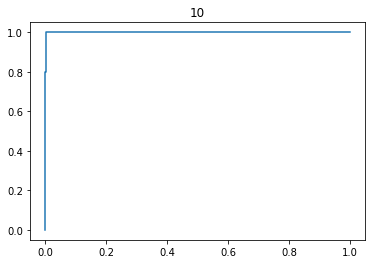

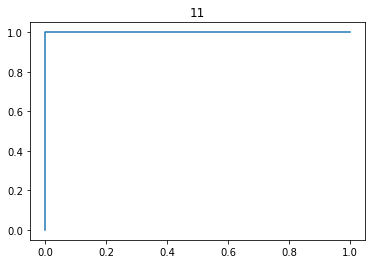

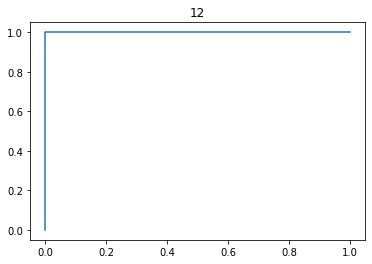

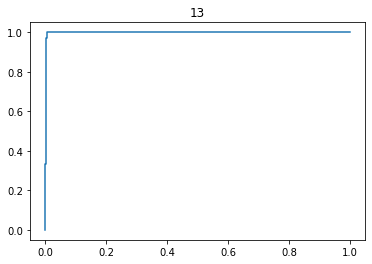

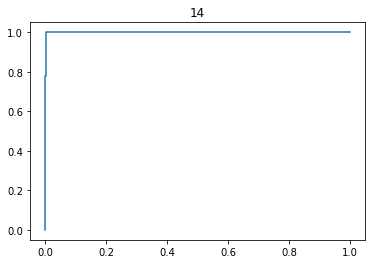

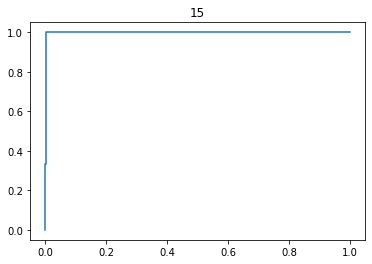

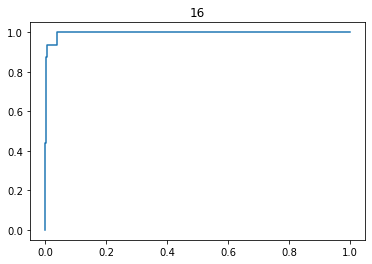

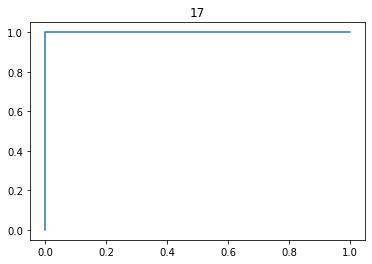

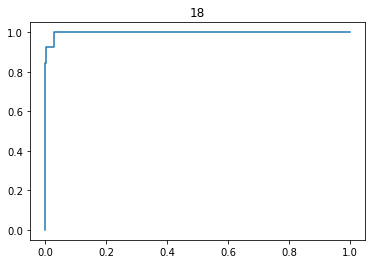

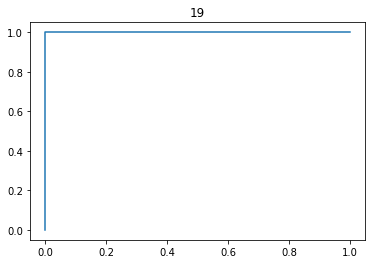

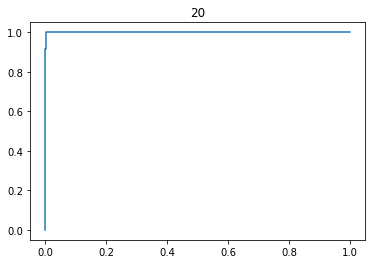

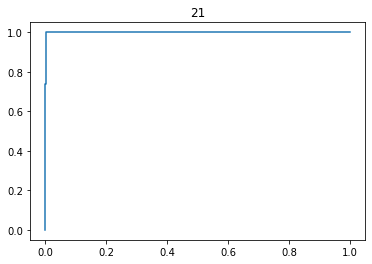

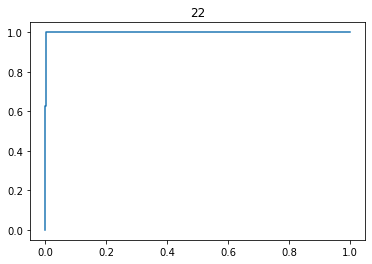

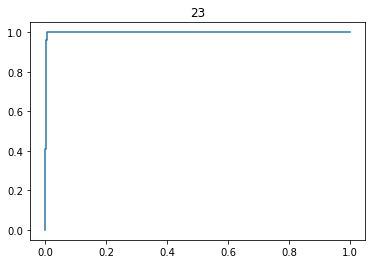

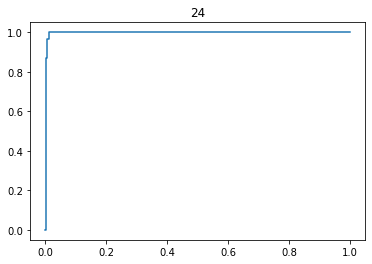

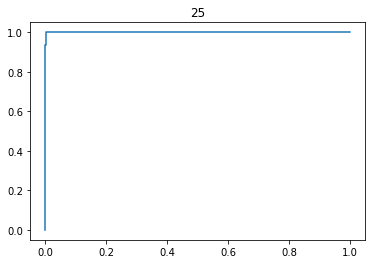

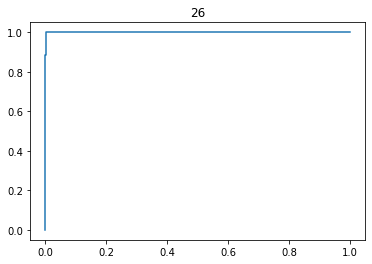

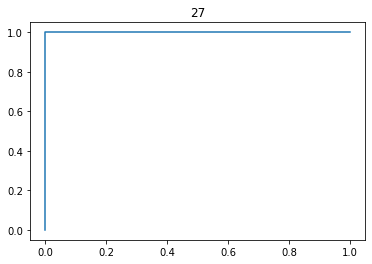

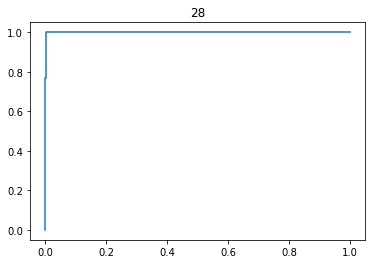

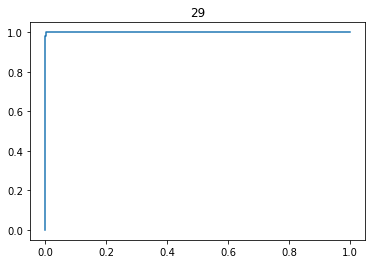

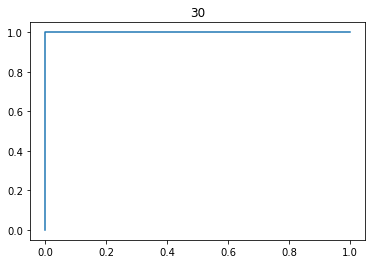

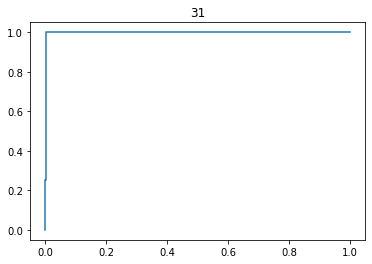

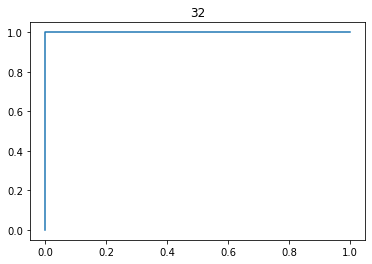

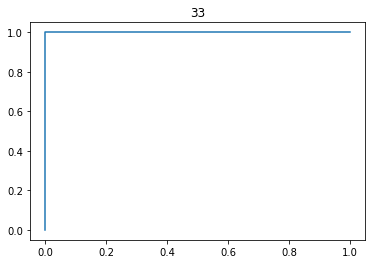

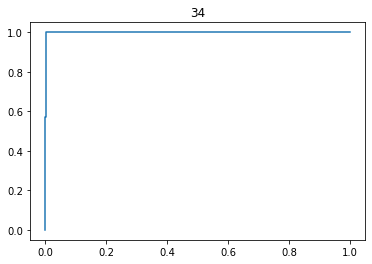

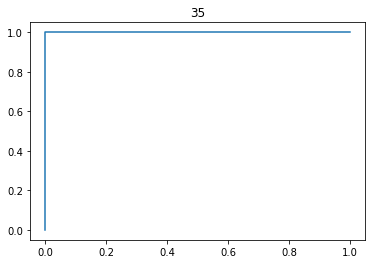

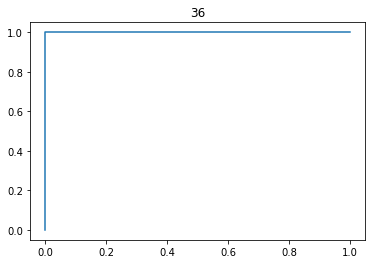

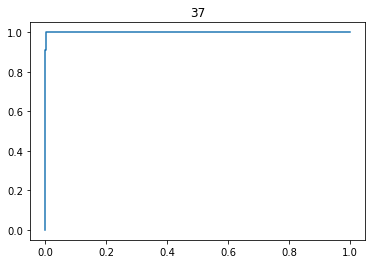

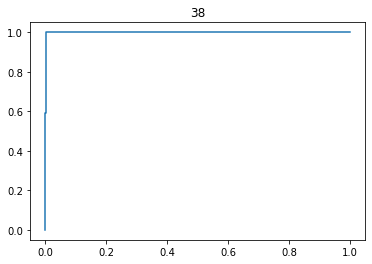

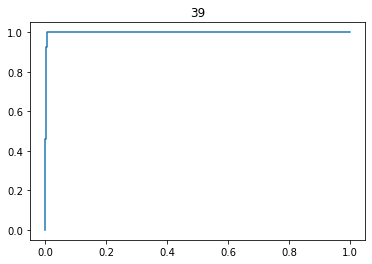

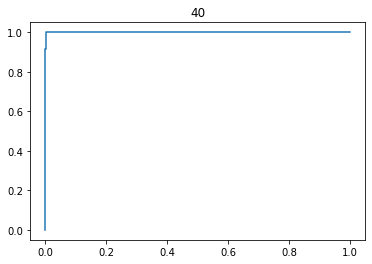

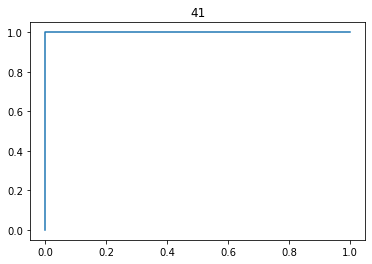

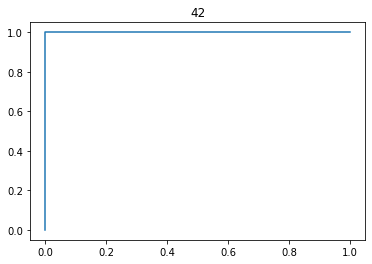

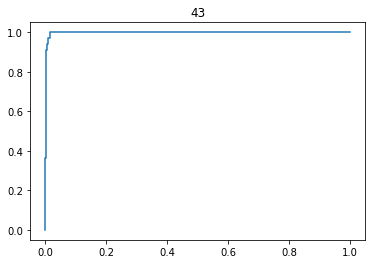

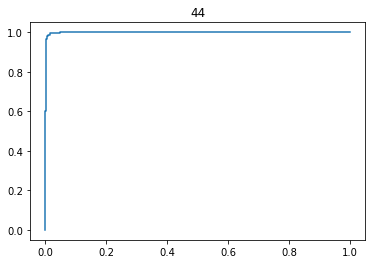

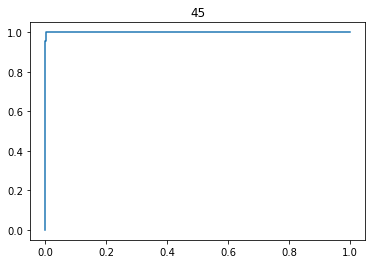

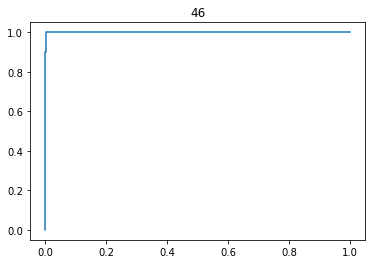

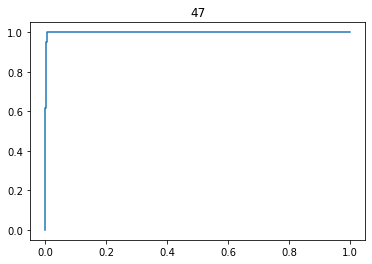

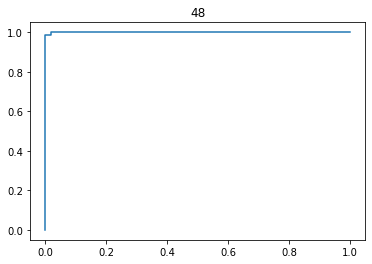

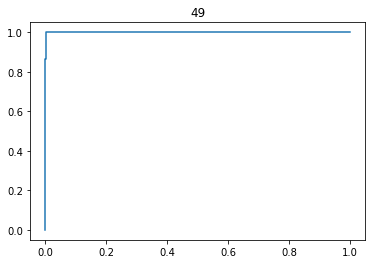

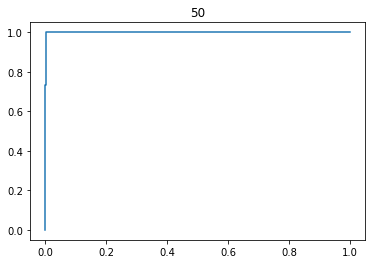

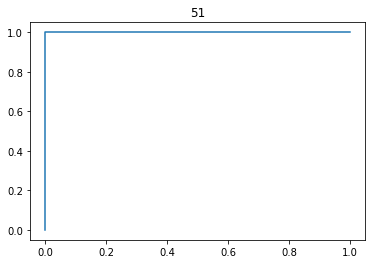

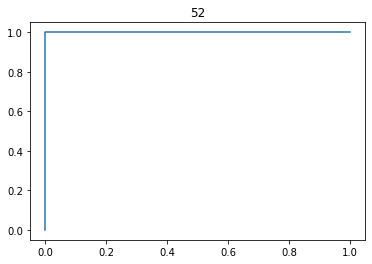

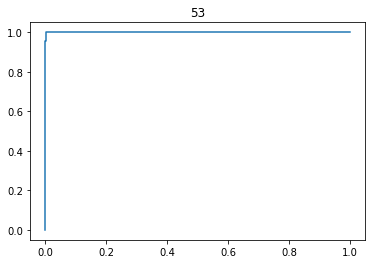

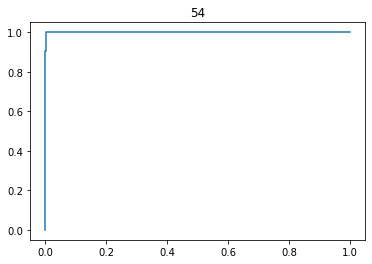

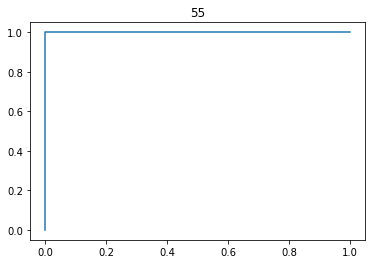

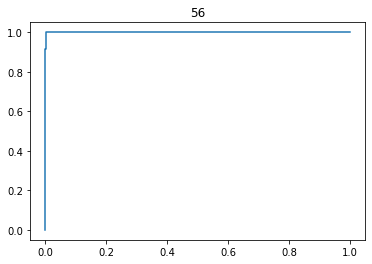

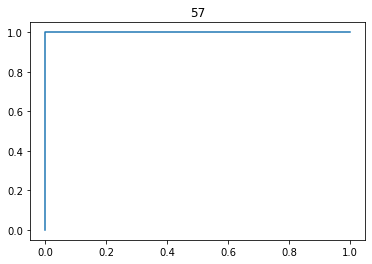

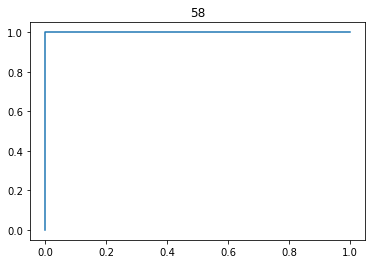

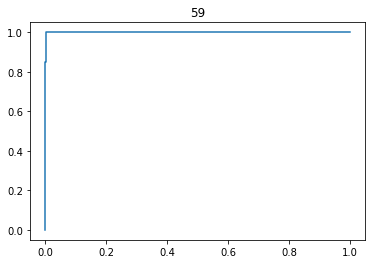

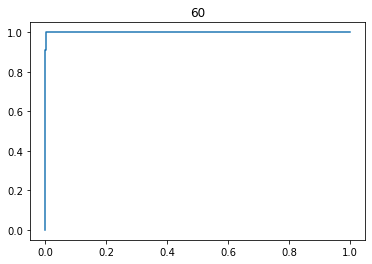

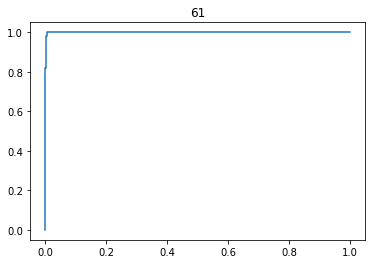

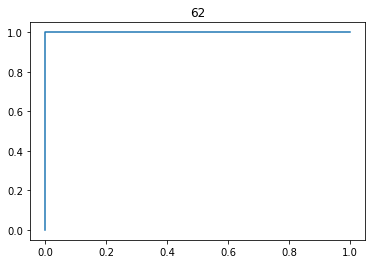

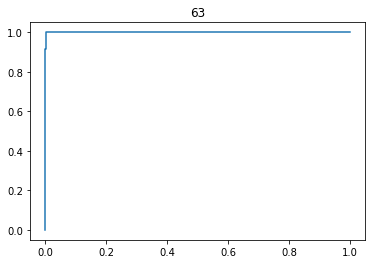

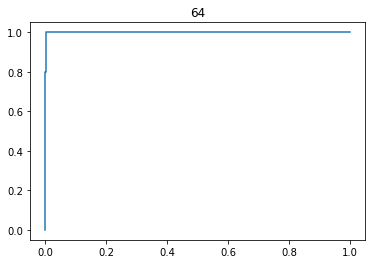

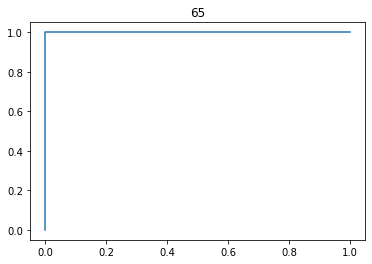

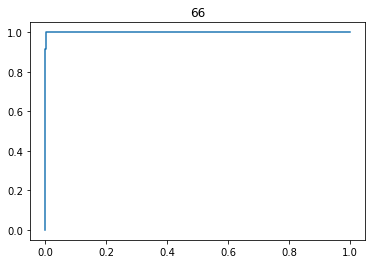

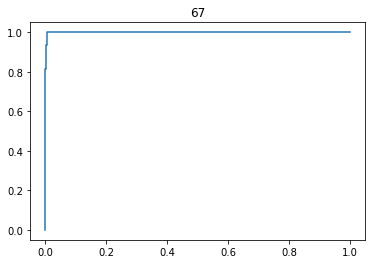

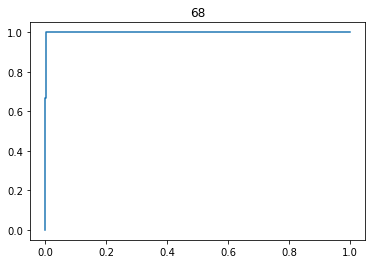

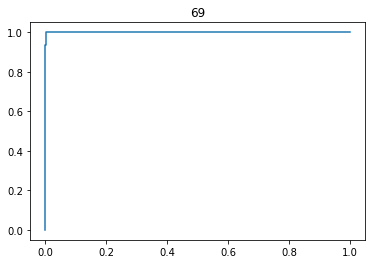

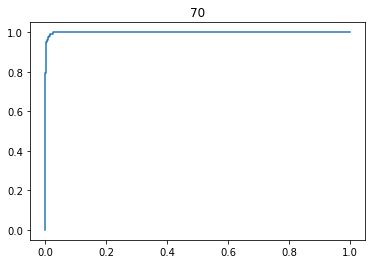

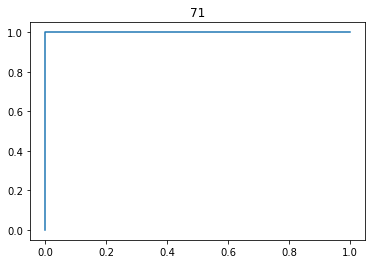

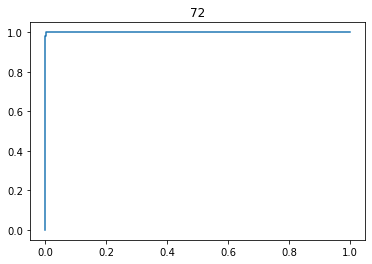

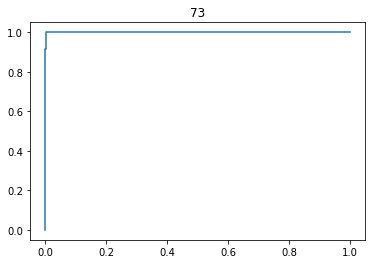

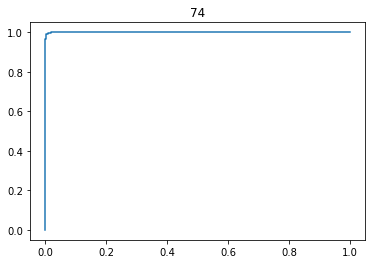

In [20]:
for i in range(75):
    fig, ax = plt.subplots()
    tpr = data[str(i) + "_tpr"][data[str(i) + "_tpr"].notnull()]
    fpr = data[str(i) + "_fpr"][data[str(i) + "_fpr"].notnull()]
    ax.plot(fpr, tpr)
    plt.title(i)

In [15]:
tpr = data["0_tpr"][data["0_tpr"].notnull()]
fpr = data["0_fpr"][data["0_fpr"].notnull()]

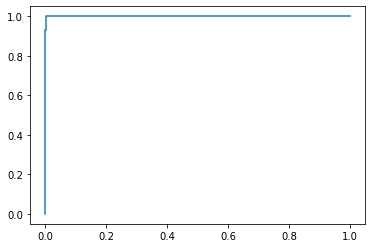

In [16]:
plt.plot(fpr, tpr)

## Generating F-beta and Boxplots

In [2]:
data = pd.read_csv("./datasets/cov_filtered_3.5_validation.csv")

In [3]:
model = "rf_multi"
# bin_vect = []
cov_vect = []
# bin_thresholds = ["bin_0.01", "bin_0.05", "bin_0.10", "bin_0.15"]
cov_thresholds = ["cov_0.52", "cov_1.5", "cov_2.5", "cov_3.5", "cov_4.5"]
# for thresh in bin_thresholds:
#     bin_vect.append(pd.read_csv("./boxplots/" + model + "_" + thresh + ".csv"))
for thresh in cov_thresholds:
    cov_vect.append(pd.read_csv("./boxplots/" + model + "_" + thresh + ".csv"))

In [ ]:
model = "rf"
bin_vect = []
cov_vect = []
bin_thresholds = ["bin_0.01", "bin_0.05", "bin_0.10", "bin_0.15"]
cov_thresholds = ["cov_0.52", "cov_1.5", "cov_2.5", "cov_3.5", "cov_4.5"]
for thresh in bin_thresholds:
    temp = pd.read_csv("./boxplots/" + model + "_" + thresh + ".csv")
    temp["Log2(Size)"] = np.log2(temp["Size"])
    bin_vect.append(temp)
for thresh in cov_thresholds:
    temp = pd.read_csv("./boxplots/" + model + "_" + thresh + ".csv")
    temp["Log2(Size)"] = np.log2(temp["Size"])
    cov_vect.append(temp)

In [ ]:
fbeta_dict = {}
for i in range(len(bin_thresholds)):
    fbeta_dict[bin_thresholds[i]] = bin_vect[i]["fbeta"]
    fbeta_plot(bin_vect[i], bin_thresholds[i])
box_plots(fbeta_dict, None, "LR Binary Score")

In [ ]:
cov_vect[0]["fbeta"]

cov_0.52
cov_1.5
cov_2.5
cov_3.5
cov_4.5
RF Multiclass Coefficient of Variation Boxplot


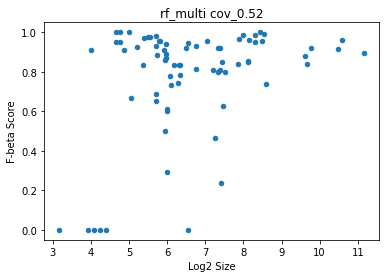

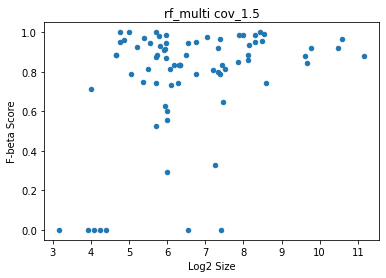

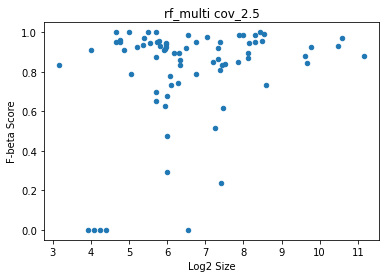

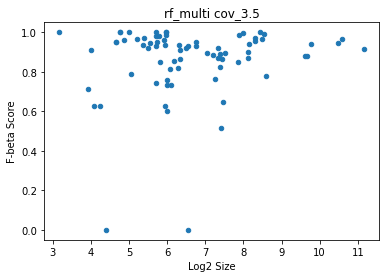

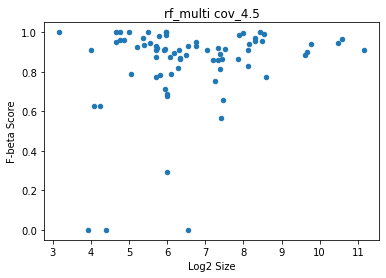

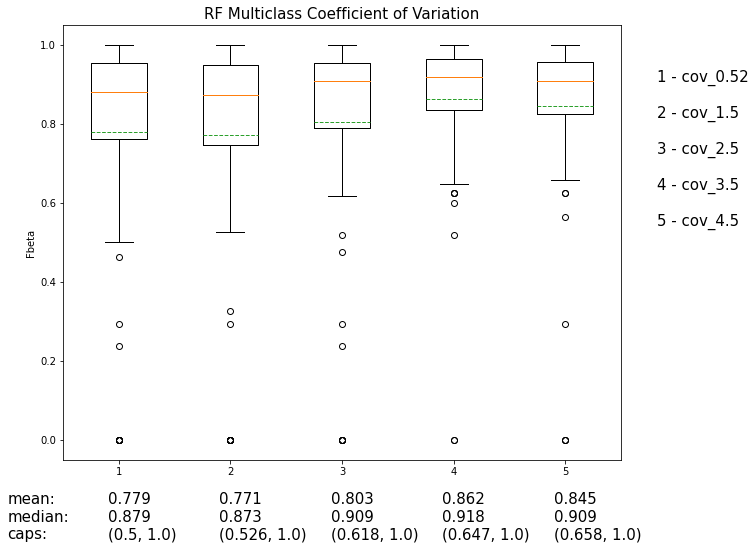

In [7]:
fbeta_dict = {}
for i in range(len(cov_thresholds)):
    fbeta_dict[cov_thresholds[i]] = list(cov_vect[i]["fbeta"])
    fbeta_plot(cov_vect[i], cov_thresholds[i])
box_plots(fbeta_dict, None, "RF Multiclass Coefficient of Variation")

## Generating Boxplot figure

In [8]:
data = pd.read_csv("./datasets/LR Multi COV and Bin FBeta.csv")

In [16]:
covs = data[["COV 0.52", "COV 1.5", "COV 2.5", "COV 3.5",  "COV 4.5"]]
bins = data[["BIN 0.15", "BIN 0.10", "BIN 0.05", "BIN 0.01"]]

In [17]:
covs.columns = ["COV 0.52\n\n11,189 genes", "COV 1.5\n\n6,063 genes", "COV 2.5\n\n3,048 genes", "COV 3.5\n\n1,426 genes", "COV 4.5\n\n709 genes"]
bins.columns = ["BIN 0.15\n\n13,445 genes", "BIN 0.10\n\n12,604 genes", "BIN 0.05\n\n10,029 genes", "BIN 0.01\n\n4,741 genes"]

In [68]:
rf_palette = ["#81d2ee", "#97daf1", "#Aee2f4", "#C5eaf7", "#Dcf2fa"]
lr_palette = ["#D9bbe1", "#D9bbe1", "#F0c3e4", "#Ffcbe7", "#Ffd3ea"]
nn_palette = ["#Eeb877", "#F8c87d", "#Ffd883", "#Ffe889", "#Fff88f"]
lgbm_palette = ["#95ee8f", "#Acf692", "#C3fe95", "#Daff98", "#F1ff9b"]
svm_palette = ["#92dacf", "#A9e2d2", "#C0ead5", "#D7f2d8", "#Eefadb"]

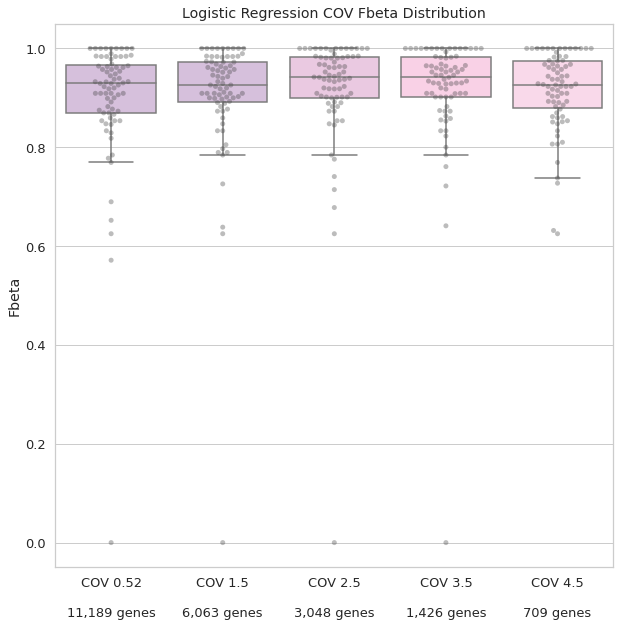

In [21]:
sns.set(style = "whitegrid", font_scale=1.18)
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = covs, showfliers=False, palette = lr_palette).set_title('Logistic Regression COV Fbeta Distribution')
sns.swarmplot(ax = ax, data = covs, size = 5, color = ".25", alpha = 0.35)
ax.set(ylabel='Fbeta')
sns_dict = sns.axes_style()

## Generating Default vs. Optimal figure

In [32]:
data = pd.read_csv("./datasets/modelComparison.csv")

In [130]:
lr1 = pd.read_csv('./default and optimal/lr_multi_default_validation_cov_3.5.csv')[["log_size", "fbeta"]]

In [131]:
data2 = pd.read_csv("./datasets/LR Multi COV and Bin FBeta.csv")

In [132]:
data2["log_size"] = lr1["log_size"]

In [133]:
lr2 = data2[["log_size", "COV 3.5"]]

In [134]:
optimal_data = lr2.copy()
optimal_data["type"] = "Optimal"
optimal_data.columns = ["Log2 Size", "Fbeta", "Hyperparameters"]

In [135]:
default_data = lr1.copy()
default_data["type"] = "Default"
default_data.columns = ["Log2 Size", "Fbeta", "Hyperparameters"]

In [138]:
w, p = wilcoxon(optimal_data["Fbeta"], default_data["Fbeta"])

In [139]:
p

0.8945757851953192

In [120]:
models = ["lgbm", "nn", "lr", "svm", "rfmulti"]
params = ["default", "optimal"]
dataset = ["validation", "training"]

In [90]:
optimal = models[4] + "_" + params[1] + "_" + dataset[0] + "_cov_3.5_fbeta"
default = models[4] + "_" + params[0] + "_" + dataset[0] + "_cov_3.5_fbeta"

In [91]:
optimal_data = data[["log_size", optimal]]
optimal_data["type"] = "Optimal"
optimal_data.columns = ["Log2 Size", "Fbeta", "Hyperparameters"]

<ipython-input-91-cab53d699664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimal_data["type"] = "Optimal"


In [92]:
default_data = data[["log_size", default]]
default_data["type"] = "Default"
default_data.columns = ["Log2 Size", "Fbeta", "Hyperparameters"]

<ipython-input-92-bbd0087417e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_data["type"] = "Default"


In [93]:
final_data = default_data.append(optimal_data)

In [117]:
markers = {"Default": "*", "Optimal": "o"}
sizes = [90, 30]
title = "Logistic Regression Fbeta"

Text(8.5, 0.475, 'p-val = $8.95x10^{-1}$')

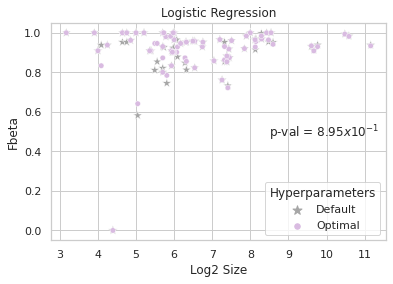

In [140]:
sns.set_theme(style="whitegrid")
sns.scatterplot(data = final_data, x = "Log2 Size", y = "Fbeta", palette = ["#A6A6A6", lr_palette[0]], hue = "Hyperparameters", style = "Hyperparameters", size = "Hyperparameters", markers = markers, sizes = sizes, legend=True).set_title(title)
plt.ylim(-0.05, 1.05)
plt.text(8.5, 0.475, r"p-val = $8.95x10^{-1}$")

## Generating Training vs. Validation vs. Test figure

In [149]:
models = ["lr_multi", "lgbm", "nn", "svm", "rfmulti"]
params = ["optimal"]
dataset = ["test", "validation", "training"]
covs = ["2.5", "3.5", "2.5", "3.5"]
title = ["LightGBM", "Neural Network", "Support Vector Machine", "Random Forest"]

In [150]:
optimal_training = "./default and optimal/" + models[0] + "_" + params[0] + "_" + dataset[2] + "_cov_3.5.csv"
optimal_validation = "./default and optimal/" + models[0] + "_" + params[0] + "_" + dataset[1] + "_cov_3.5.csv"
optimal_test = "./default and optimal/" + models[0] + "_" + params[0] + "_" + dataset[0] + "_cov_3.5.csv"

optimal_training = pd.read_csv(optimal_training, index_col = 0)
optimal_validation = pd.read_csv(optimal_validation, index_col = 0)
optimal_test = pd.read_csv(optimal_test, index_col = 0)

In [151]:
title = "Logistic Regression"

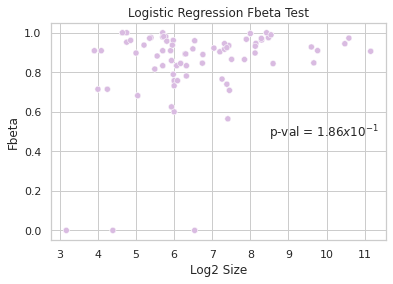

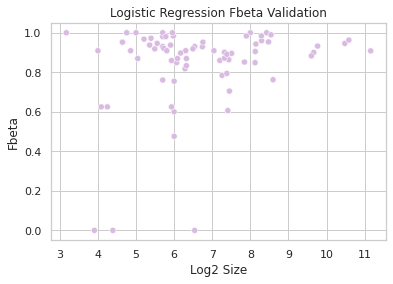

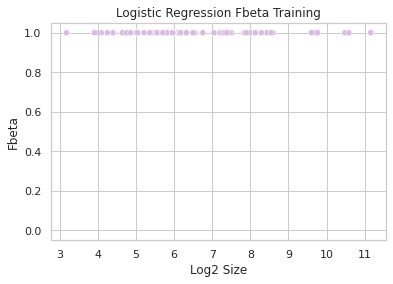

In [152]:
sns.set_theme(style="whitegrid")
for i in dataset:
    fig, ax = plt.subplots()
    optimal_dataset = "./default and optimal/" + models[4] + "_" + params[0] + "_" + i + "_cov_3.5.csv"
    optimal_dataset = pd.read_csv(optimal_dataset, index_col = 0)
    data_1 = optimal_dataset[["log_size", "fbeta"]].copy()
    data_2 = optimal_dataset[["log_size", "fbeta"]].copy()
    data_1["type"] = "One"
    data_2["type"] = "Two"
    final_data = data_1.append(data_2)
    sns.scatterplot(data = final_data, ax = ax, x = "log_size", y = "fbeta", palette = [lr_palette[0], lr_palette[0]], hue = "type", legend = False).set_title(title + " Fbeta " + i[0].capitalize() + i[1:])
    plt.ylim(-0.05, 1.05)
    plt.xlabel("Log2 Size")
    plt.ylabel("Fbeta")
    
    if i == "test":
        plt.text(8.5, 0.475, r"p-val = $1.86x10^{-1}$")

## Generating Test Data Boxplot figure

In [69]:
models = ["lgbm", "nn", "svm", "rf_multi"]
params = ["optimal"]
dataset = ["test", "validation", "training"]
covs = ["2.5", "3.5", "2.5", "3.5"]
title = ["LightGBM", "Neural Network", "Support Vector Machine", "Random Forest"]

In [70]:
optimal_dataset = "./default and optimal/" + models[0] + "_" + params[0] + "_" + dataset[0] + "_cov_" + covs[0] + ".csv"
optimal_dataset = pd.read_csv(optimal_dataset, index_col = 0)
boxplots = pd.DataFrame()
boxplots["log_size"] = optimal_dataset["log_size"]

In [71]:
optimal_dataset = "./default and optimal/" + models[0] + "_" + params[0] + "_" + dataset[0] + "_cov_" + covs[0] + ".csv"
optimal_dataset = pd.read_csv(optimal_dataset, index_col = 0)
boxplots = pd.DataFrame()
boxplots["log_size"] = optimal_dataset["log_size"]
for i in range(len(models)):
    optimal_dataset = "./default and optimal/" + models[i] + "_" + params[0] + "_" + dataset[0] + "_cov_" + covs[i] + ".csv"
    optimal_dataset = pd.read_csv(optimal_dataset, index_col = 0)
    boxplots[title[i]] = optimal_dataset["fbeta"]

In [72]:
optimal_dataset = "./default and optimal/" + "lr_multi_" + params[0] + "_" + dataset[0] + "_cov_" + covs[1] + ".csv"
optimal_dataset = pd.read_csv(optimal_dataset, index_col = 0)
boxplots["Logistic Regression"] = optimal_dataset["fbeta"]

In [73]:
boxplots

,log_size,LightGBM,Neural Network,Support Vector Machine,Random Forest,Logistic Regression
0,8.475733,0.988858,0.974930,0.982906,0.974930,0.985915
1,11.157347,0.951435,0.944041,0.939287,0.907216,0.956750
2,9.665336,0.885714,0.919023,0.890493,0.838052,0.904818
3,5.700440,1.000000,0.873016,0.952381,0.978261,0.978261
4,6.000000,0.901639,0.797101,0.853659,0.757576,0.923077
...,...,...,...,...,...,...
70,9.601771,0.965026,0.927771,0.957031,0.937500,0.970052
71,5.700440,0.909091,0.564516,0.652174,0.847458,0.873016
72,7.894818,0.983264,0.983607,0.978723,0.967078,0.983264
73,5.954196,0.961538,0.964912,0.937500,0.937500,0.982143


In [74]:
boxplots = boxplots.drop(["log_size"], axis=1)

In [75]:
boxplots = boxplots[["Neural Network", "Random Forest", "Logistic Regression", "LightGBM", "Support Vector Machine"]]

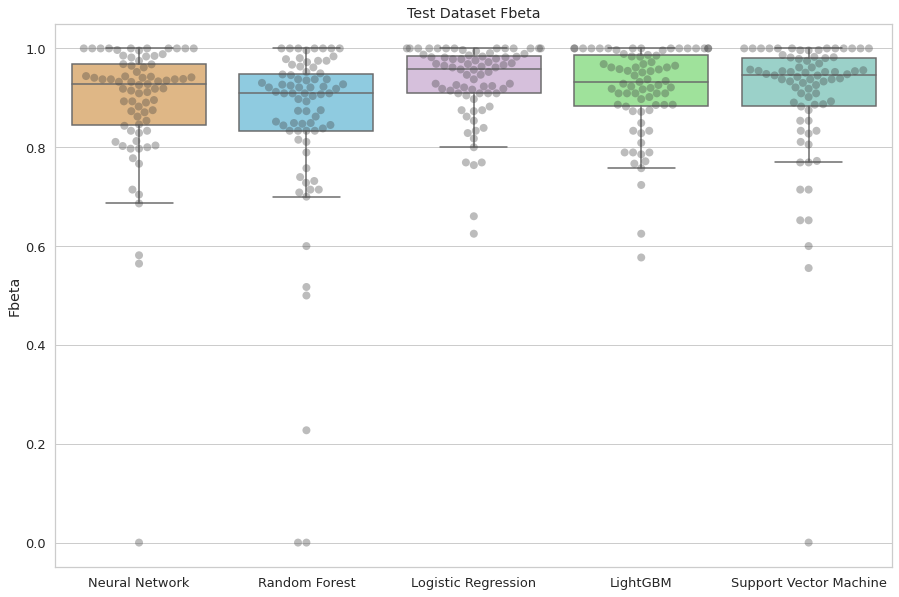

In [76]:
sns.set(style = "whitegrid", font_scale=1.18)
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = boxplots, showfliers=False, palette = [nn_palette[0], rf_palette[0], lr_palette[0], lgbm_palette[0], svm_palette[0]]).set_title('Test Dataset Fbeta')
sns.swarmplot(ax = ax, data = boxplots, size = 8, color = ".25", alpha = 0.35)
ax.set(ylabel='Fbeta')
sns_dict = sns.axes_style()

## Misc. Functions

In [5]:
def box_plots(fbeta_dict, path, Title):
    reg_param = fbeta_dict
    x_legend = '\n'.join(f'{n} - {name}\n' for n,name in zip(range(1, len(reg_param.keys()) + 1),reg_param.keys()))
    fig2, ax = plt.subplots(figsize=(10,8))
    boxplot = ax.boxplot(reg_param.values(), showmeans = True, meanline=True)
    ax.text(0.95,.5,x_legend,transform=ax.figure.transFigure, fontsize = 15)
    medians = [item.get_ydata()[1] for item in boxplot['medians']]
    means = [item.get_ydata()[1] for item in boxplot['means']]
    caps = [item.get_ydata()[1] for item in boxplot['caps']]
    ax.text(0, -0.25, "mean:\nmedian:\ncaps:", fontsize = 15)
    for i in range(len(reg_param)):
        curr_str = str(round(means[i], 3)) + "\n"
        curr_str += str(round(medians[i], 3)) + "\n"
        curr_str += "(" + str(round(caps[2 * i], 3)) + ", " + str(round(caps[2 * i + 1], 3)) + ")"
        ax.text((i+1) - 0.1, -0.25, curr_str, fontsize = 15)
    print(Title + " Boxplot")
    plt.title(Title, fontsize = 15)
    plt.ylabel("Fbeta")
    plt.ylim(-0.05, 1.05)
    if path is not None:
        path = path + Title + " Boxplot.png"
        plt.savefig(path)

In [6]:
def fbeta_plot(cm, Title):
    print(Title)
    fig = cm.plot.scatter(x="log_size", y="fbeta",ylim=[-0.05, 1.05], title=model + " " + Title).get_figure()
    plt.xlabel("Log2 Size")
    plt.ylabel("F-beta Score")